# Demonstration of PreProcessing System

In [1]:
from PreProcessing import PreProcessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyconll
import os
import Utility
PATH = "DATA"
conllu_files = pd.Series(os.listdir(PATH))
conllu_files = conllu_files[conllu_files.str.contains('.conllu')].values.tolist()

Initialization of PreProcessing class

In [2]:
pp = PreProcessing()

### A - Sentence Splitters

Loading the UD corpuses

In [3]:
%%time
sentences = []
for file in conllu_files: #[0:2]
    data = pyconll.load_from_file(PATH + "/" + file)
    for sentence in data:
        s = sentence.text
        
        # many of the sentences in the corpus are not in fact sentences, ending with comma, or no punctuation at all
        # so we are turning them into sentences by adding ellipsis
        
        if s[-1] not in pp.MLBasedSentenceSplitter.sentence_ending_punctuations:
            s += '...'
        sentences.append(s)
        
print(len(sentences), 'sentences are loaded.')

19276 sentences are loaded.
Wall time: 3 s


Test strings for sentence splitters

In [4]:
string = 'Bugun canım çok sıkıldı. Yarın da sıkılacak, yarın da... Hep...'
string2 = 'Sayın Av. Meryem Beşer dedi ki... Sonra da dedi ki, "dava düştü konu kapandı".'

#### Machine Learning Based Sentence Splitter

Training and Testing using our own implementation of Naive Bayes Classifier

In [5]:
%%time
pp.MLBasedSentenceSplitter.fit(sentences, model = 'NBC')
y = pp.MLBasedSentenceSplitter.create_labels(sentences)
y_hat = pp.MLBasedSentenceSplitter.predict(' '.join(sentences), model = 'NBC')
pp.all_metrics_together(y, y_hat)

Wall time: 50min 29s


,Accuracy,Recall,Precision,F1
Score,0.875256,0.103761,0.300436,0.15425


Training and Testing using scikit-learn's vanilla Logistic Regression

In [6]:
%%time
pp.MLBasedSentenceSplitter.fit(sentences, model = 'LogisticRegression')
y = pp.MLBasedSentenceSplitter.create_labels(sentences)
y_hat = pp.MLBasedSentenceSplitter.predict(' '.join(sentences), model = 'LogisticRegression')
pp.all_metrics_together(y, y_hat)

Wall time: 51min 11s


,Accuracy,Recall,Precision,F1
Score,0.893389,0.061634,0.643902,0.1125


#### Rule Based Sentence Splitter

In [7]:
splitted_sentences = pp.RuleBasedSentenceSplitter.split_text_into_sentences(' '.join(sentences))
list_for_recall = [1 if sentence in sentences else 0 for sentence in splitted_sentences]
list_for_precision = [1 if sentence in splitted_sentences else 0 for sentence in sentences]
recall = np.mean(list_for_recall)
precision = np.mean(list_for_precision)
f1_score = 2 / (recall ** -1 + precision ** -1)
df_rulebasedresults = pd.DataFrame([recall, precision, f1_score], columns = ['Score'], index = ['Recall', 'Precision', 'F1 Score']).T
df_rulebasedresults

,Recall,Precision,F1 Score
Score,0.916042,0.886647,0.901104


#### Visual Inspection of Sentence Splitting

Testing on the first string

In [ ]:
string = 'Bugun canım çok sıkıldı. Yarın da sıkılacak, yarın da... Hep...'
string2 = 'Sayın Av. Meryem Beşer dedi ki... Sonra da dedi ki, "dava düştü konu kapandı".'

In [8]:
print('Naive Bayes result:', pp.MLBasedSentenceSplitter.split_text_into_sentences(string, model = 'NBC'))
print('LogisticRegression result:', pp.MLBasedSentenceSplitter.split_text_into_sentences(string, model = 'LogisticRegression'))
print('Rule Based result:', pp.RuleBasedSentenceSplitter.split_text_into_sentences(string))

Naive Bayes result: ['Bugun canım çok sıkıldı.', 'Yarın da sıkılacak, yarın da...', 'Hep...']
LogisticRegression result: ['Bugun canım çok sıkıldı. Yarın da sıkılacak, yarın da... Hep...']
Rule Based result: ['Bugun canım çok sıkıldı.', 'Yarın da sıkılacak, yarın da...', 'Hep...']


Testing on the second string

In [9]:
print('Naive Bayes result:', pp.MLBasedSentenceSplitter.split_text_into_sentences(string2, model = 'NBC'))
print('LogisticRegression result:', pp.MLBasedSentenceSplitter.split_text_into_sentences(string2, model = 'LogisticRegression'))
print('Rule Based result:', pp.RuleBasedSentenceSplitter.split_text_into_sentences(string2))

Naive Bayes result: ['Sayın', 'Av.', 'Meryem', 'Beşer dedi ki...', 'Sonra da dedi ki,', '"dava düştü konu kapandı".']
LogisticRegression result: ['Sayın Av. Meryem Beşer dedi ki... Sonra da dedi ki, "dava düştü konu kapandı".']
Rule Based result: ['Sayın Av. Meryem Beşer dedi ki...', 'Sonra da dedi ki, "dava düştü konu kapandı".']


### B - Tokenizer

Test strings for tokenization

In [10]:
test_sentence1 = "merhaba, name@gmail.com <html>!! www.abc.com #hello selam# nasılsınız:  milli eğitim bakanlığı Av. Hatice Hanım 2.01.1997'de 20:02'de aradı"
test_sentence2 = 'boğaziçi üniversitesi öğrencileri dönemi uzaktan geçirdi.'

#### Rule Based Tokenizer

Testing the rule based Tokenizer

In [11]:
# Rule Based Tokenizer Test:
list_of_tokens = pp.RuleBasedTokenizer.tokenize(test_sentence1)
print(list_of_tokens)
list_of_tokens2 = pp.RuleBasedTokenizer.tokenize(test_sentence2)
print(list_of_tokens2)

['merhaba', ',', 'name@gmail.com', '<html>', '!!', 'www.abc.com', '#hello', 'selam', '#', 'nasılsınız', ':', 'milli eğitim bakanlığı', 'Av.', 'Hatice', 'Hanım', "2.01.1997'de", "20:02'de", 'aradı']
['boğaziçi üniversitesi', 'öğrencileri', 'dönemi', 'uzaktan', 'geçirdi', '.']


#### Machine Learning Based Tokenizer

Testing the ML based Tokenizer

Training and Testing using our own implementation of Naive Bayes Classifier

In [12]:
%%time

tokenization_corpus = Utility.load_file(PATH + "/" + "handmade_turkish_blog_corpus.txt")

pp.MLBasedTokenizer.fit(tokenization_corpus, model = 'NBC')
y = pp.MLBasedTokenizer.create_labels(tokenization_corpus)
y_hat = pp.MLBasedTokenizer.predict(tokenization_corpus)
pp.all_metrics_together(y, y_hat)

Wall time: 13.2 s


,Accuracy,Recall,Precision,F1
Score,0.86805,0.21142,0.80479,0.334869


Training and Testing using scikit-learn's vanilla Logistic Regression

In [13]:
%%time
pp.MLBasedTokenizer.fit(tokenization_corpus, model = 'LogisticRegression')
y = pp.MLBasedTokenizer.create_labels(tokenization_corpus)
y_hat = pp.MLBasedTokenizer.predict(tokenization_corpus, model = 'LogisticRegression')
pp.all_metrics_together(y, y_hat)


Wall time: 1.02 s


,Accuracy,Recall,Precision,F1
Score,0.996471,0.99682,0.981024,0.988859


In [33]:
tokenizer_test1 = "merhaba! Nasılsınız? Ben çok iyiyim."

print('Original sentence is:', tokenizer_test1)
print('Naive Bayes result:', pp.MLBasedTokenizer.split_to_tokens(tokenizer_test1, model = 'NBC'))
print('LogisticRegression result:', pp.MLBasedTokenizer.split_to_tokens(tokenizer_test1, model = 'LogisticRegression'))
print('Rule Based result:', pp.RuleBasedTokenizer.tokenize(tokenizer_test1))
print("\n")
tokenizer_test2 = "merhaba. nasılsınız? Ben 22.12.1996 gününde !Eskişehir'den 20:02 treniyle (buraya) geldim."
print('Original sentence is:', tokenizer_test2)
print('Naive Bayes result:', pp.MLBasedTokenizer.split_to_tokens(tokenizer_test2, model = 'NBC'))
print('LogisticRegression result:', pp.MLBasedTokenizer.split_to_tokens(tokenizer_test2, model = 'LogisticRegression'))
print('Rule Based result:', pp.RuleBasedTokenizer.tokenize(tokenizer_test2))


Original sentence is: merhaba! Nasılsınız? Ben çok iyiyim.
Naive Bayes result: ['merhaba', '! Nasılsınız', '? Ben çok iyiyim', '.']
LogisticRegression result: ['merhaba', '!', ' Nasılsınız', '?', ' Ben', ' çok', ' iyiyim', '.']
Rule Based result: ['merhaba', '!', 'Nasılsınız', '?', 'Ben', 'çok', 'iyiyim', '.']


Original sentence is: merhaba. nasılsınız? Ben 22.12.1996 gününde !Eskişehir'den 20:02 treniyle (buraya) geldim.
Naive Bayes result: ['merhaba', '.', ' nasılsınız', '? Ben ', '2', '2', '.', '12', '.', '19', '9', '6', 'g', 'ününde ', "!Eskişehir'den ", '2', '0', ':', '02', 't', 'reniyle ', '(buraya', ') geldim', '.']
LogisticRegression result: ['merhaba', '.', ' nasılsınız', '?', ' Ben', ' 22.12.1996', ' gününde', '!', "Eskişehir'den", ' 20:02', ' treniyle', '(', 'buraya', ')', ' geldim', '.']
Rule Based result: ['merhaba', '.', 'nasılsınız', '?', 'Ben', '22.12.1996', 'gününde', '!', "Eskişehir'den", '20:02', 'treniyle', '(', 'buraya', ')', 'geldim', '.']


### C - Normalizer

- removes punctuations
- converts letters to lower case
- does not alter the token further if it is in MWE lexicon
- converts numbers to text form
- removes accent marks
- corrects typos (using Lexicon + Levenshtein distance (calculated for both consonants and whole word))

In [29]:
test_list_for_normalizer = ['Benim', 'kedımin', 'surati', 'gri', 'gozleri', 'ise', 'sarı', 'renkkte...']
test_list2_for_normalizer = ['Kâh', 'gulduk', 'kôh', '3', 'kez', 'yere', 'düştuk...!!!', 've', 'sırada...']
test_list3_for_normalizer = ['Türk Hava Yolları!!!']
normalized_tokens = pp.Normalizer.normalize(test_list_for_normalizer)
normalized_tokens_2 = pp.Normalizer.normalize(test_list2_for_normalizer)
normalized_tokens_3 = pp.Normalizer.normalize(test_list3_for_normalizer)
print(normalized_tokens)
print(normalized_tokens_2)
print(normalized_tokens_3)

['benim', 'kedimin', 'suratı', 'gri', 'gözleri', 'ise', 'sarı', 'renkte']
['kah', 'güldük', 'kah', 'üç', 'kez', 'yere', 'düştük', 've', 'sırada']
türk hava yolları


### D - Stemmer

Test words for stemming

In [16]:
test_word1 = 'kitapçılardan'
test_word2 = 'biliyorlardı'
test_word3 = 'nasılsınız'
test_word4 = 'gözlemek'
test_word5 = 'yapamayacaklarmış'
test_word6 = 'kalelerimizdekilerden'
test_word7 = 'kulaklıklarım'
test_word8 = 'plakçıların'
test_word9 = 'kodlama'
test_word10 = 'mutluluktan'

Stemmer Test:

In [17]:
# Stemmer test:
stem1 = pp.Stemmer.stemmer(test_word1)
stem2 = pp.Stemmer.stemmer(test_word2)
stem3 = pp.Stemmer.stemmer(test_word3)
stem4 = pp.Stemmer.stemmer(test_word4)
stem5 = pp.Stemmer.stemmer(test_word5)
stem6 = pp.Stemmer.stemmer(test_word6)
stem7 = pp.Stemmer.stemmer(test_word7)
stem8 = pp.Stemmer.stemmer(test_word8)
stem9 = pp.Stemmer.stemmer(test_word9)
stem10 = pp.Stemmer.stemmer(test_word10)
print('Test word 1 is:', test_word1, 'Stem is:', stem1)
print('Test word 2 is:', test_word2, 'Stem is:', stem2)
print('Test word 3 is:', test_word3, 'Stem is:', stem3)
print('Test word 4 is:', test_word4, 'Stem is:', stem4)
print('Test word 5 is:', test_word5, 'Stem is:', stem5)
print('Test word 6 is:', test_word6, 'Stem is:', stem6)
print('Test word 7 is:', test_word7, 'Stem is:', stem7)
print('Test word 8 is:', test_word8, 'Stem is:', stem8)
print('Test word 9 is:', test_word9, 'Stem is:', stem9)
print('Test word 10 is:', test_word10, 'Stem is:', stem10)


kitapçılar
kitapçı
kitap
kitapçılarda
kitap
is noun
biliyorlard
biliyorlar
biliyor
bili
bil
biliyorlar
biliyor
is verb
nasılsı
nasılsı
nasıl
nasılsı
is verb
gözle
göz
gözleme
is verb
yapamayacaklar
yapamayacak
yapamay
yapa
yap
is verb
kalelerimizdekiler
kalelerimizdeki
kalelerimizde
kalelerimiz
kaleleri
kale
kalelerimizdekilerde
kale
is noun
kulaklıkları
kulaklık
kulak
kulaklıklar
kulaklıkl
kulaklıkları
kulak
is noun
plakçılar
plakçı
plak
plakçıları
plak
is noun
kodla
kodla
kod
is verb
mutluluk
mutlu
mutlulukta
mutlu
is noun
Test word 1 is: kitapçılardan Stem is: kitap
Test word 2 is: biliyorlardı Stem is: bil
Test word 3 is: nasılsınız Stem is: nasıl
Test word 4 is: gözlemek Stem is: göz
Test word 5 is: yapamayacaklarmış Stem is: yap
Test word 6 is: kalelerimizdekilerden Stem is: kale
Test word 7 is: kulaklıklarım Stem is: kulak
Test word 8 is: plakçıların Stem is: plak
Test word 9 is: kodlama Stem is: kod
Test word 10 is: mutluluktan Stem is: mutlu


Output of Tokenizer will be fed into stopword eliminator

### E - Stopword Eliminator

Test strings for stopword removal

In [18]:
example_sent = "Deneme deneme ama bu şu o bu bir cümle ve belki bu bir cümle"

#### Static Stopword Eliminator

Static stopword eliminator removes all stopwords in the sentence based on a predefined list.

In [19]:
# Static Stopword Test
word_tokens, filtered_sentence = pp.StaticStopWordEliminator.remove_stopwords(example_sent)
print('Original sentence: ', example_sent)
print('Filtered sentence: ', filtered_sentence)

Original sentence:  Deneme deneme ama bu şu o bu bir cümle ve belki bu bir cümle
Filtered sentence:  ['Deneme', 'deneme', 'cümle', 'cümle']


#### Dynamic Stopword Eliminator

Dynamic Stopword eliminator takes list of tokens as input, and detects them using Detect() function

In [20]:
# Re reading whole corpus
sentences = []
for file in conllu_files:
    data = pyconll.load_from_file(PATH + "/" + file)
    for sentence in data:
        s = sentence.text
        
        # many of the sentences in the corpus are not in fact sentences, ending with comma, or no punctuation at all
        # so we are turning them into sentences by adding ellipsis
        
        if s[-1] not in pp.MLBasedSentenceSplitter.sentence_ending_punctuations:
            s += '...'
        sentences.append(s)

normalized_tokens = []
for sentence in sentences:
    tokenized_sentence = pp.RuleBasedTokenizer.tokenize(sentence)
    for token in tokenized_sentence:
        normalized_token = pp.Normalizer.remove_punctuations(token)
        normalized_token = pp.Normalizer.convert_to_lower_case(normalized_token)
        normalized_token = pp.Normalizer.remove_accent_marks(normalized_token)
        normalized_tokens.append(normalized_token) if normalized_token != '' else None
        
print('Number of tokenized and normalized tokens:', len(normalized_tokens))

Number of tokenized and normalized tokens: 175953


Given list of tokens, detect stop words function dynamically determines the stop words

In [21]:
pp.DynamicStopWordEliminator.detect_stop_words(normalized_tokens)

Detected stop words for the given corpus are: ['bir', 've', 'bu', 'de', 'da', 'için', 'o', 'çok', 'daha', 'gibi', 'ne', 'her', 'sonra', 'kadar', 'en', 'ama', 'ile', 'olarak', 'ben', 'olan', 'ki', 'var', 'diye', 'dedi', 'büyük', 'iki', 'yeni', 'ya', 'değil', 'gün', 'zaman', 'şey', 'önce', 'hiç', 'iyi', 'bana', 'yok', 'ise', 'benim', 'içinde', 'olduğunu']


Given list of tokens, drop stop words function drops the stop words and returns the dropped list

In [22]:
pp.DynamicStopWordEliminator.drop_stop_words(['NOT_STOP_WORD', 'bir', 've', 'bu', 'de', 'da', 'için', 'o', 'çok', 'daha', 'gibi', 'ne', 'her', 'sonra', 'kadar', 'en', 'ama', 'ile', 'olarak', 'ben', 'olan', 'ki', 'var', 'diye', 'dedi', 'büyük', 'iki', 'yeni', 'ya', 'değil', 'gün', 'zaman', 'şey', 'önce', 'hiç', 'iyi', 'bana', 'yok', 'ise', 'benim', 'içinde', 'olduğunu'])

['NOT_STOP_WORD']

In [23]:
unq, cnts = np.unique(normalized_tokens, return_counts = True)
df_words = pd.DataFrame({'word': unq, 'counts': cnts}).sort_values(by = 'counts', ascending = False).reset_index(drop = True)
argmax_second_der = df_words['counts'].pct_change().abs().pct_change().abs().dropna().idxmax()

In [35]:
df_words.head(25)

,word,counts
0,bir,4791
1,ve,3062
2,bu,2224
3,de,1417
4,da,1294
5,için,981
6,o,886
7,çok,840
8,daha,743
9,gibi,677


Text(50, 4000, 'Threshold selected according to Elbow Rule(argmax of 2nd derivative)')

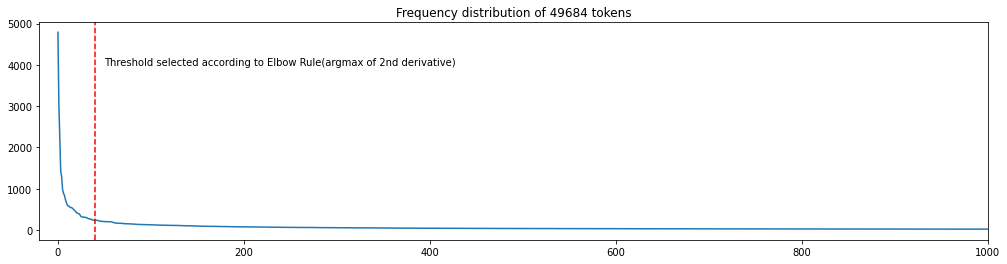

In [25]:
f, ax = plt.subplots(figsize = (17, 4))
ax.plot(df_words['counts'])
ax.set_title('Frequency distribution of ' + str(len(unq)) + ' tokens')
ax.set_xlim(-20, 1000)
ax.axvline(argmax_second_der, color = 'red', ls = '--')
ax.annotate('Threshold selected according to Elbow Rule(argmax of 2nd derivative)',(argmax_second_der + 10, 4000), size = 10)